In [1]:
import sys
sys.path.append("/home/andrei/GitProjects/HeteroR/workflow/scripts")
from GRF_parser import parse_grf_output
import pandas as pd

# Intro
Here you'll find some summary and plots related to direct repeats found in our strains by GRF

Last update:

In [2]:
str(pd.to_datetime('today'))

'2021-12-17 13:35:48.556587'

So far 11 strains were processed using GRF. Here they are:

In [3]:
%cd "/home/andrei/Data/HeteroR/results/direct_repeats/"
%ls

/home/andrei/Data/HeteroR/results/direct_repeats
DA62886/  DA63052/  DA63160/  DA63362/  DA63680/  DA63752/  DA63876/  DA63980/
DA62892/  DA63054/  DA63178/  DA63366/  DA63682/  DA63758/  DA63882/  DA63988/
DA62902/  DA63060/  DA63182/  DA63368/  DA63684/  DA63760/  DA63884/  DA64000/
DA62918/  DA63062/  DA63186/  DA63382/  DA63686/  DA63766/  DA63888/  DA64002/
DA62920/  DA63082/  DA63210/  DA63570/  DA63688/  DA63770/  DA63890/  DA64004/
DA62942/  DA63084/  DA63218/  DA63594/  DA63690/  DA63776/  DA63900/  DA64006/
DA62944/  DA63094/  DA63226/  DA63596/  DA63696/  DA63784/  DA63914/  DA64014/
DA62946/  DA63098/  DA63244/  DA63608/  DA63702/  DA63790/  DA63916/  DA64024/
DA62954/  DA63102/  DA63248/  DA63626/  DA63706/  DA63816/  DA63918/  DA64026/
DA62958/  DA63106/  DA63252/  DA63640/  DA63710/  DA63818/  DA63926/  DA64030/
DA62978/  DA63112/  DA63254/  DA63642/  DA63714/  DA63826/  DA63940/  DA64048/
DA62998/  DA63122/  DA63264/  DA63644/  DA63718/  DA63828/  DA63942/  DA64058/
DA6

Now I have some results of repeats analysis in 11 strains.
For strain DA62886 GRF found 1.4 million repeats with the following settings (minimal repeat length 10 bp, no mismatches):

`grf-main -i regions_output.fasta -c 2 -o DA62886_perfect_repeats_GRF_test -t 10 --min_tr 10 -f 1 --max_mismatch
0 --seed_mismatch 0 --max_space 204000 --min_space 500`

Some repeats were counted more than once, so duplicates are removed from the table below

Results look like this:

In [4]:
import glob

def make_repeats_df(spacer_file, strain_index=0):
    # remove duplicated rows!
    with open(spacer_file) as f:
        output_lines = [line.rstrip() for line in f.readlines()]
    parsed_lines = [parse_grf_output(line) for line in output_lines]
    spacer_df = pd.DataFrame(columns=["record_id", "start_1", "end_1", "start_2", "end_2", "length"], data=parsed_lines)
    spacer_df["strain"] = spacer_file.split("/")[strain_index]
    return spacer_df


# read spacer files and make DF for each
grf_results_df =pd.concat([make_repeats_df(file) for file in glob.glob("DA*/repeats/perfect.spacer.id")])

grf_results_df

,record_id,start_1,end_1,start_2,end_2,length,strain
0,1,123259,123269,323162,323172,10,DA63668
1,1,124227,124237,322983,322993,10,DA63668
2,1,124249,124259,322600,322610,10,DA63668
3,1,124164,124175,322029,322040,11,DA63668
4,1,125381,125393,323221,323233,12,DA63668
...,...,...,...,...,...,...,...
1556362,9,59429,59440,59970,59981,11,DA64024
1556363,9,49987,49997,50517,50527,10,DA64024
1556364,9,1096,1113,1612,1629,17,DA64024
1556365,9,67459,67469,67974,67984,10,DA64024


In [5]:
grf_results_df.drop_duplicates(inplace=True)

# Number of repeats per strain

### As a table

In [6]:
nrows_df = pd.DataFrame(grf_results_df["strain"].value_counts())
nrows_df = nrows_df.rename(columns={"strain": "counts"})
nrows_df["strain"] = nrows_df.index
nrows_df

,counts,strain
DA63726,689221,DA63726
DA63026,673534,DA63026
DA63862,670311,DA63862
DA63850,630109,DA63850
DA63366,624716,DA63366
DA63702,623753,DA63702
DA64024,613124,DA64024
DA62886,610817,DA62886
DA63668,608037,DA63668
DA63776,604903,DA63776


### As a barplot

<AxesSubplot:xlabel='strain', ylabel='counts'>

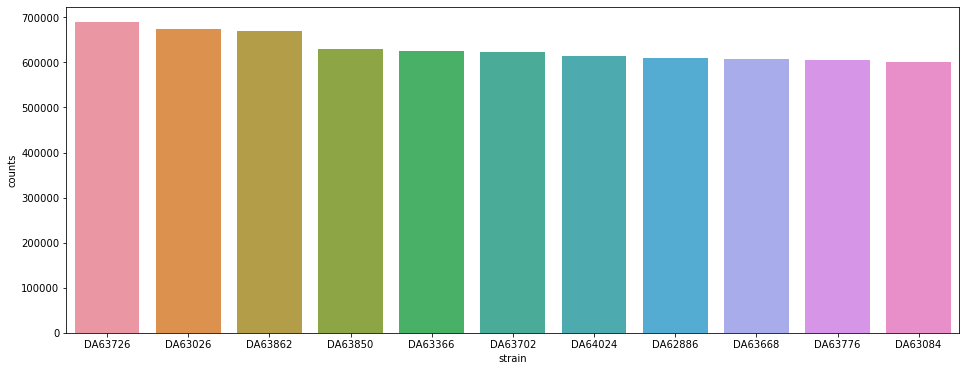

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16,6))

sns.barplot(x="strain", y="counts", data=nrows_df)


# Repeat length distribution


[None]

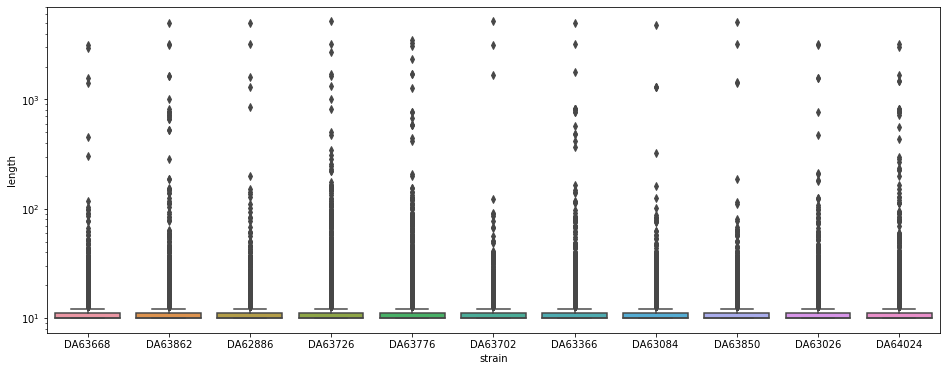

In [20]:
plt.figure(figsize=(16, 6))

bxplt = sns.boxplot(x="strain", y="length", data=grf_results_df)
bxplt.set(yscale="log")

# Test run of GRF for imperfect repeats

As it was planned - max mismatch 10%

`grf-main -i regions.fasta -c 2 -o out_mismatch10 -t 14 --min_tr 10 -f 1 --max_mismatch 10 --seed_mismatch 0 --max_space 205000 --min_space 500`

it gives 1 394 678 lines

In [8]:
mismatch_output = "/home/andrei/Data/HeteroR/test_dir/GRF/DA63366/out_mismatch10/perfect.spacer.id"

mismatch_df = make_repeats_df(mismatch_output, strain_index=7)

mismatch_df

,record_id,start_1,end_1,start_2,end_2,length,strain
0,1,156785,156796,355577,355588,11,DA63366
1,1,155793,155803,354429,354439,10,DA63366
2,1,156991,157004,355523,355536,13,DA63366
3,1,155876,155886,354108,354118,10,DA63366
4,1,157996,158006,355931,355941,10,DA63366
...,...,...,...,...,...,...,...
1394673,2,86562,86574,87116,87128,12,DA63366
1394674,2,67576,67587,68111,68122,11,DA63366
1394675,2,57930,57940,58456,58466,10,DA63366
1394676,2,90519,90534,91034,91049,15,DA63366


In [9]:
mismatch_df.drop_duplicates(inplace=True)
len(mismatch_df)


567249

In [10]:
len(grf_results_df.strain=="DA63366")

6950230

In [12]:
grf_results_df[grf_results_df.strain=="DA63366"].length.describe()

count    624716.000000
mean         10.441657
std           8.454774
min          10.000000
25%          10.000000
50%          10.000000
75%          11.000000
max        4972.000000
Name: length, dtype: float64

a lot less without duplicates

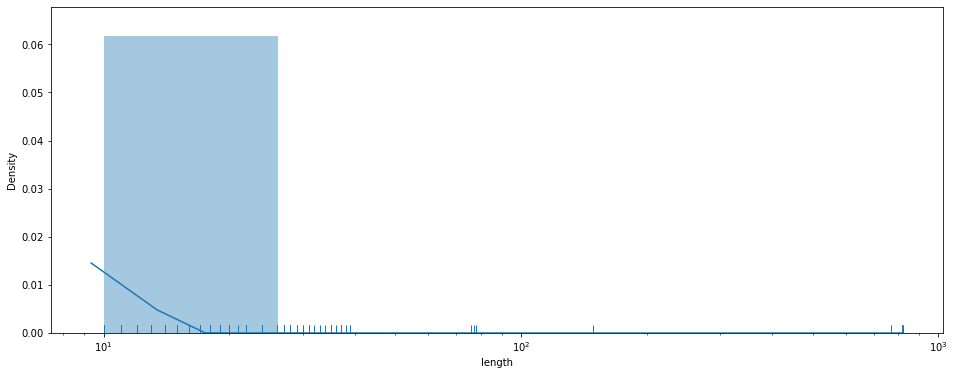

In [ ]:
plt.figure(figsize=(16, 6))

dstrplt = sns.distplot(mismatch_df.length, rug=True, bins=100)
dstrplt.set(xscale="log")

# Repeat quantification

For example, I will use strain 5 strains with annotated repeats:

DA63084
DA63186
DA63322
DA63946
DA64026

Parse GRF output using `GRF_parser.py`

>"perfect.id": TDRs with perfect stems and no spacer in the middle.
"perfect.spacer.id": TDRs with perfect stems and a spacer in the middle.
"imperfect.id": TDRs with imperfect stems.

Another question: size of amplifiable region: how to find? distance between repeats of similar length within one region and on the different?

## Prepare function form GRF_parser.py

In [1]:
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation, ExactPosition
import pandas as pd
#from BCBio import GFF
import os

# some functions from GRF_parser
def parse_grf_output_w_ranges(header):
    """
    MUST BE RE-WRITTEN (OR NOT) FOR A CASE WHEN A GENE NAME IS IN THE HEADER
    :param header: a char string like '>1:0-190543:951:190482:14m' or '>1:155171-355997:1372:198472:10m1D3m'
    :return: a list of values from parsed header
    """
    first_split = header.split(":")
    record_id = first_split[0][1:]
    # this works for both mismatch or no mismatch types of output
    repeat_len = int(first_split[-1].split("m")[0])
    range_ = first_split[1].split("-")
    range_start, range_end = int(range_[0]), int(range_[-1])
    repeat_1_start_in_range = int(first_split[2])
    repeat_2_end_in_range = int(first_split[3])

    repeat_1_start_in_chrom = range_start + repeat_1_start_in_range
    repeat_1_end_in_chrom = repeat_1_start_in_chrom + repeat_len

    repeat_2_end_in_chrom = range_start + repeat_2_end_in_range
    repeat_2_start_in_chrom = repeat_2_end_in_chrom - repeat_len

    return [record_id, repeat_1_start_in_chrom, repeat_1_end_in_chrom, repeat_2_start_in_chrom,
            repeat_2_end_in_chrom, repeat_len]


def parse_grf_output_no_ranges(header):
    """
    for newer version of grf files: '>IPFHMEHC_00036_gene:12520:113509:13m1I2m2I5m' or
    '>IPFHMEHC_00036_gene:95122:101284:29m'
    where headers do not contain coordinates of regions on chromosome (i.e. 'ranges')
    :param header: a string from grf output, see above
    :return: a list of coordinates from this header ready to be turned into a gff-record
    """
    first_split = header.split(":")
    record_id = first_split[0][1:]
    repeat_len = int(first_split[-1].split("m")[0])
    repeat_1_start_in_range = int(first_split[1])
    repeat_1_end_in_range = repeat_1_start_in_range + repeat_len
    repeat_2_end_in_range = int(first_split[2])
    repeat_2_start_in_range = repeat_2_end_in_range - repeat_len
    return [record_id, repeat_1_start_in_range, repeat_1_end_in_range, repeat_2_start_in_range, repeat_2_end_in_range,
            repeat_len]


def make_repeat_df(input_grf, min_len):
    # read spacer IDs
    with open(input_grf) as f:
        repeat_ids = [line.rstrip() for line in f.readlines()]

    # read assembly
    # assembly = [rec for rec in SeqIO.parse(input_assembly, "fasta")]

    # make features rows from spacer IDs
    gff_rows = [parse_grf_output_no_ranges(line) for line in repeat_ids]
    gff_df = pd.DataFrame(columns=["record_id", "start_1", "end_1", "start_2", "end_2", "length"], data=gff_rows)
    gff_df.drop_duplicates(inplace=True)

    # filter out too short repeats
    gff_df = gff_df[gff_df.length > min_len]

    # make a gff object from this filtered data frame
    # one SeqRecord with features per record in assembly
    # gff_records = [gff_object(gff_df, record) for record in assembly]
    return gff_df

Input files

In [2]:
# strains = ["DA63084", "DA63186", "DA63322", "DA63946", "DA64026"]
with open("/home/andrei/Data/HeteroR/resources/strain_lists/strains_w_direct_repeats.txt") as f:
    strains = [line.rstrip() for line in f.readlines()]

# main_path = "/Users/andgu885/GoogleDrive/HeteroR/tests/repeat_quantification/%s/perfect.spacer.id"
main_path = "/home/andrei/Data/HeteroR/results/direct_repeats/%s/repeats_no_mismatch/perfect.spacer.id"
len(strains)

181

In [3]:
import random

random.seed(99)
sample_strains = random.sample(strains, 20)
sample_strains

['DA63746',
 'DA63726',
 'DA63264',
 'DA63946',
 'DA63214',
 'DA63336',
 'DA63360',
 'DA63144',
 'DA63060',
 'DA63362',
 'DA63728',
 'DA63894',
 'DA64024',
 'DA64058',
 'DA63900',
 'DA63966',
 'DA63870',
 'DA63760',
 'DA63958',
 'DA63938']

## Make a DataFrame with repeats

There is no repeated rows (i.e. pair of coordinates) and nothing shorter than `min_len`

In [28]:
# cd "/home/andrei/Data/HeteroR"
df_lst = list()
for strain in sample_strains:
    file_path = main_path %strain
    df = make_repeat_df(input_grf=file_path, min_len=20)
    df["strain"] = strain
    df_lst.append(df)
    
repeat_df = pd.concat(df_lst)
repeat_df.head()

,record_id,start_1,end_1,start_2,end_2,length,strain
0,NLNDJLKM_00032_gene,93805,93827,94164,94186,22,DA63746
2,NLNDJLKM_00223_gene,58879,58906,174272,174299,27,DA63746
5,NLNDJLKM_00223_gene,64607,64680,65572,65645,73,DA63746
6,NLNDJLKM_00223_gene,64681,64717,65646,65682,36,DA63746
7,NLNDJLKM_00223_gene,64737,64828,65702,65793,91,DA63746


In [29]:
len(repeat_df)

31939

In [6]:
repeat_df.to_csv("/home/andrei/Data/HeteroR/results/repeats_sample_summary_table.csv")

In [6]:
repeat_df[repeat_df["strain"]==sample_strains[0]]

,record_id,start_1,end_1,start_2,end_2,length,strain
0,NLNDJLKM_00032_gene,93805,93827,94164,94186,22,DA63746
2,NLNDJLKM_00223_gene,58879,58906,174272,174299,27,DA63746
5,NLNDJLKM_00223_gene,64607,64680,65572,65645,73,DA63746
6,NLNDJLKM_00223_gene,64681,64717,65646,65682,36,DA63746
7,NLNDJLKM_00223_gene,64737,64828,65702,65793,91,DA63746
...,...,...,...,...,...,...,...
604,NLNDJLKM_04358_gene,96319,96344,158218,158243,25,DA63746
605,NLNDJLKM_04358_gene,53779,53807,101393,101421,28,DA63746
606,NLNDJLKM_04358_gene,101394,101419,118058,118083,25,DA63746
608,NLNDJLKM_04358_gene,148364,148390,149782,149808,26,DA63746


What I can look at?

- lengths distribution 
   - overall
   - per gene 
- count per gene
- distances between repeats

##  Number of unique repeats

By unique lengths

In [5]:
len(set(repeat_df.length))

277

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10


## Repeat length distribution

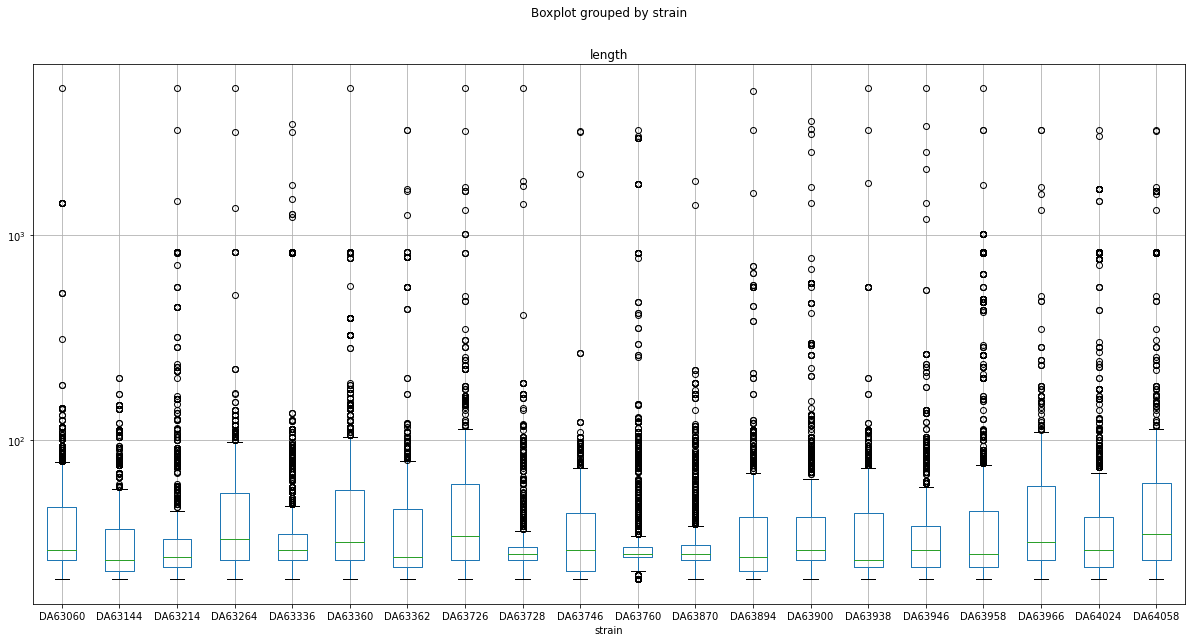

In [17]:
bxplt = repeat_df.boxplot(column='length', by='strain')
bxplt.set_yscale('symlog')

## Repeat count distribution

### Overall

In [6]:
repeat_counts = repeat_df.groupby(by=["record_id", "strain"]).size()
repeat_counts = pd.DataFrame(repeat_counts).reset_index(level=["strain", "record_id"])
repeat_counts = repeat_counts.rename(columns={0:"n_repeats"})
#repeat_counts.index = repeat_counts.record_id
repeat_counts

,record_id,strain,n_repeats
0,CJDLKIEM_00071_gene,DA63144,3
1,CJDLKIEM_00139_gene,DA63144,6
2,CJDLKIEM_00256_gene,DA63144,8
3,CJDLKIEM_00268_gene,DA63144,8
4,CJDLKIEM_00496_gene,DA63144,2
...,...,...,...
1218,OOBMOKAB_04937_gene,DA63336,42
1219,OOBMOKAB_04939_gene,DA63336,42
1220,OOBMOKAB_05039_gene,DA63336,20
1221,OOBMOKAB_05042_gene,DA63336,20


### Number of RGs with repeats in surrounding regions

In [8]:
repeat_counts.groupby(by=["strain"]).size()

strain
DA63060    61
DA63144    54
DA63214    61
DA63264    61
DA63336    65
DA63360    64
DA63362    61
DA63726    64
DA63728    56
DA63746    56
DA63760    68
DA63870    56
DA63894    57
DA63900    67
DA63938    57
DA63946    62
DA63958    64
DA63966    58
DA64024    61
DA64058    70
dtype: int64

### Repeat counts around each RG by strain

<AxesSubplot:xlabel='strain', ylabel='n_repeats'>

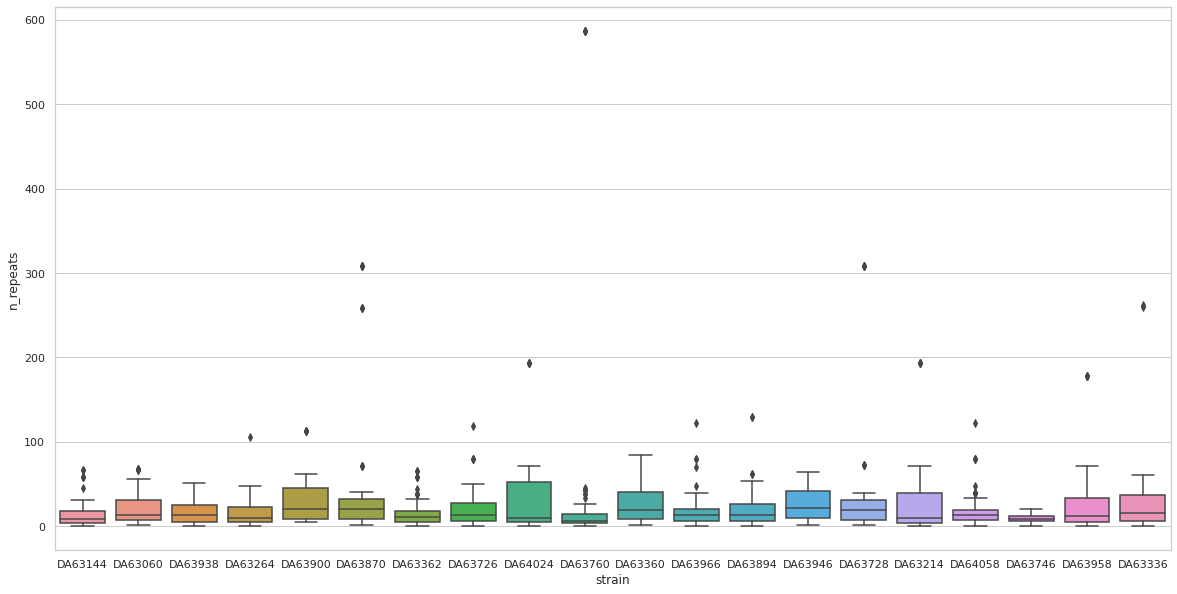

In [19]:
import seaborn as sns 
sns.set_theme(style="whitegrid")
sns.boxplot(y="n_repeats", x="strain", data=repeat_counts)

In [13]:
repeat_counts_sample = repeat_counts[(repeat_counts["strain"] == sample_strains[0]) | (repeat_counts["strain"] == sample_strains[1]) | (repeat_counts["strain"] == sample_strains[2])]

/home/andrei/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


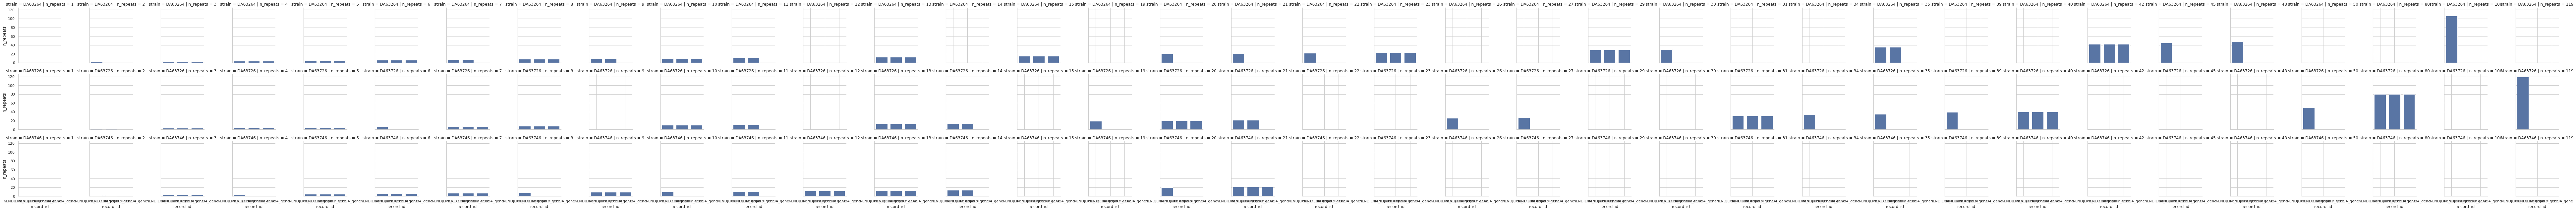

In [20]:
g = sns.FacetGrid(repeat_counts_sample, col="n_repeats",  row="strain")
g.map(sns.barplot, "record_id", "n_repeats")

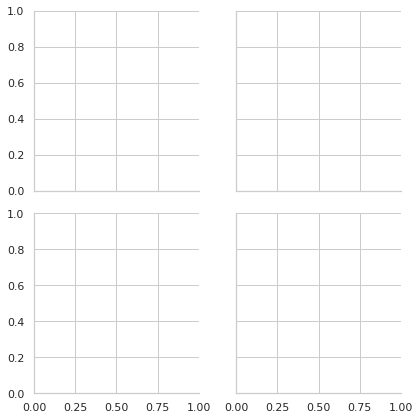

In [21]:
tips = sns.load_dataset("tips")
sns.FacetGrid(tips, col="time", row="sex")

In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


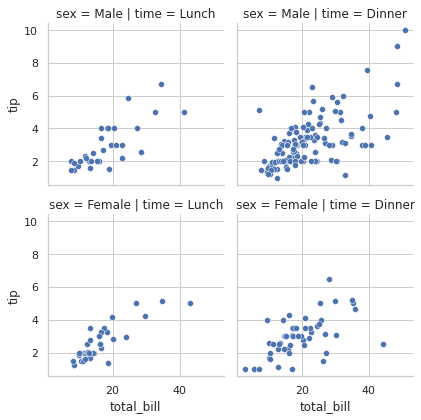

In [23]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

## Repeat couts per gene

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,7
for strain in sample_strains:
    repeat_counts[repeat_counts.strain == strain].plot.bar(x="record_id", y="n_repeats", title=strain)


## Distances between repeat pairs aka AR length

In [30]:
repeat_df["ARL"] = repeat_df.start_2 - repeat_df.end_1
repeat_df.head()

,record_id,start_1,end_1,start_2,end_2,length,strain,ARL
0,NLNDJLKM_00032_gene,93805,93827,94164,94186,22,DA63746,337
2,NLNDJLKM_00223_gene,58879,58906,174272,174299,27,DA63746,115366
5,NLNDJLKM_00223_gene,64607,64680,65572,65645,73,DA63746,892
6,NLNDJLKM_00223_gene,64681,64717,65646,65682,36,DA63746,929
7,NLNDJLKM_00223_gene,64737,64828,65702,65793,91,DA63746,874


<AxesSubplot:xlabel='strain', ylabel='ARL'>

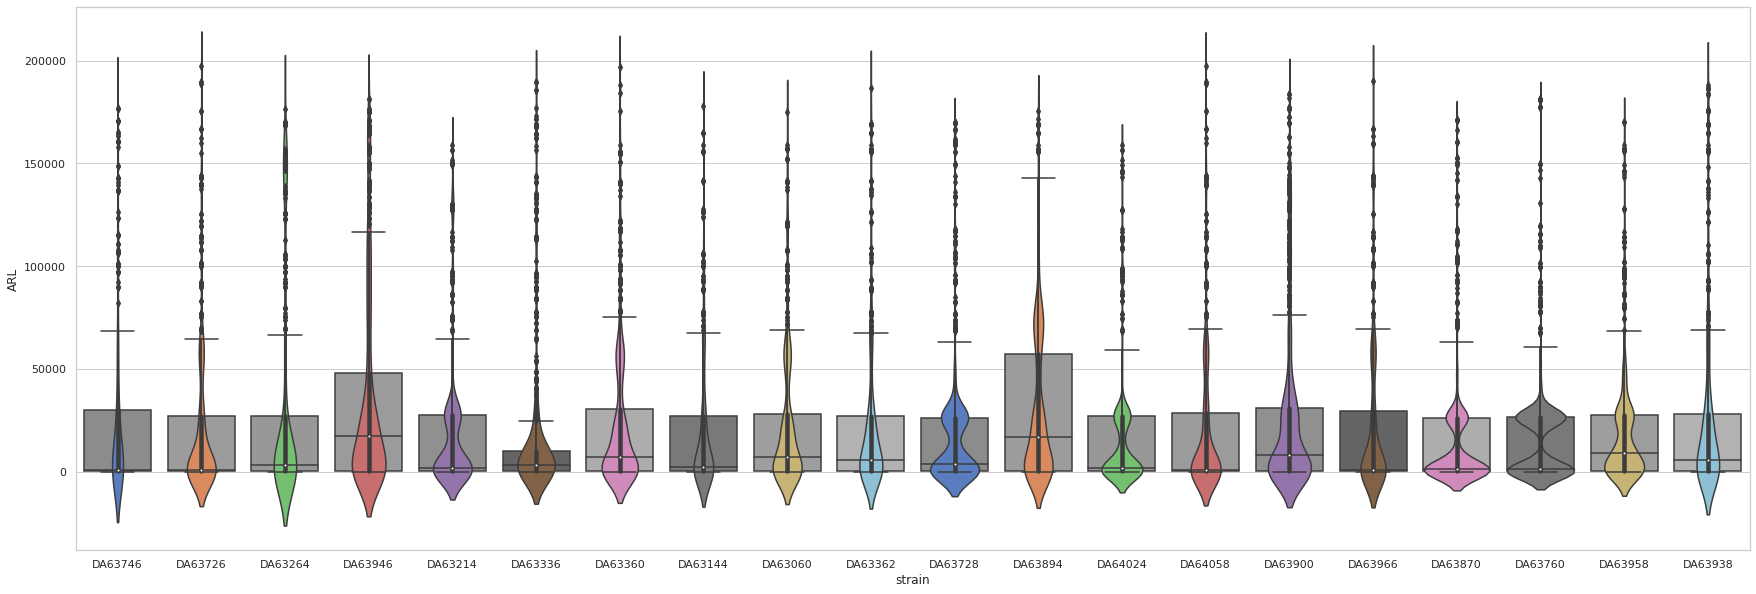

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=30,10
sns.set_theme(style="whitegrid")

#repeat_df.boxplot(column="ARL", by="strain")
sns.boxplot(x="strain", y="ARL", data=repeat_df, palette="muted", saturation=0.0)
sns.violinplot(x="strain", y="ARL", data=repeat_df, palette="muted", scale="count")

In [8]:
repeat_df[repeat_df.ARL < 0]

,record_id,start_1,end_1,start_2,end_2,length,strain,ARL


### How many repeat pairs spanning the middle of the range?

I need bed file: regions_within.bed
there I can find regions around RGs - to find the middle of each region

files are here:

results/direct_repeats/DA*/regions/regions_within.bed


In [13]:
DA63746_bed = pd.read_csv("/home/andrei/Data/HeteroR/results/direct_repeats/DA63746/regions/regions_within.bed", delimiter='\t', header=None)
DA63746_bed.columns = ["chromosome", "start", "end", "gene_name", "score", "strand"]
DA63746_bed.head()

,chromosome,start,end,gene_name,score,strand
0,1,0,134836,NLNDJLKM_00032_gene,0,1
1,1,143530,344356,NLNDJLKM_00223_gene,0,1
2,1,144723,345453,NLNDJLKM_00224_gene,0,1
3,1,145814,348929,NLNDJLKM_00226_gene,0,-1
4,1,148952,350111,NLNDJLKM_00227_gene,0,-1


I can find each gene's center

In [14]:
DA63746_bed["gene_center"] = (DA63746_bed["end"] - DA63746_bed["start"] + 1)/2
DA63746_bed["region_length"] = DA63746_bed["end"] - DA63746_bed["start"]

DA63746_bed.head()

,chromosome,start,end,gene_name,score,strand,gene_center,region_length
0,1,0,134836,NLNDJLKM_00032_gene,0,1,67418.5,134836
1,1,143530,344356,NLNDJLKM_00223_gene,0,1,100413.5,200826
2,1,144723,345453,NLNDJLKM_00224_gene,0,1,100365.5,200730
3,1,145814,348929,NLNDJLKM_00226_gene,0,-1,101558.0,203115
4,1,148952,350111,NLNDJLKM_00227_gene,0,-1,100580.0,201159


In [31]:
repeat_df[repeat_df["strain"] == "DA63746"].head()

,record_id,start_1,end_1,start_2,end_2,length,strain,ARL
0,NLNDJLKM_00032_gene,93805,93827,94164,94186,22,DA63746,337
2,NLNDJLKM_00223_gene,58879,58906,174272,174299,27,DA63746,115366
5,NLNDJLKM_00223_gene,64607,64680,65572,65645,73,DA63746,892
6,NLNDJLKM_00223_gene,64681,64717,65646,65682,36,DA63746,929
7,NLNDJLKM_00223_gene,64737,64828,65702,65793,91,DA63746,874


In [15]:
DA63746_bed[DA63746_bed.gene_name == "NLNDJLKM_00032_gene"]

,chromosome,start,end,gene_name,score,strand,gene_center,region_length
0,1,0,134836,NLNDJLKM_00032_gene,0,1,67418.5,134836


Every RG has one region with one center
Every region contains several repeats
For each repeat find if it spans the region's centre

In [80]:


#repeat_df["span_center"] = "no"

new_df_list = list()
for gene in DA63746_bed.gene_name:
    df_strain = repeat_df[repeat_df["strain"] == "DA63746"]
    #region_start = DA63746_bed[DA63746_bed.gene_name == gene].start[0]
    #region_end = DA63746_bed[DA63746_bed.gene_name == gene].end[0]
    center = DA63746_bed[DA63746_bed.gene_name == gene].gene_center[0]
    
    df = df_strain.loc[df_strain.loc[:, "record_id"] == gene]
    df["spans_center"] = "no"
    # compare repeat ends with region middle using df.loc (see below)
    df.loc[(df["end_1"] <= center) & (df["start_2"] >= center), 'spans_center'] = 'yes'
    new_df_list.append(df)

/tmp/ipykernel_2280025/3339931275.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["spans_center"] = "no"
/home/andrei/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


KeyError: 0

In [68]:
df_strain

,record_id,start_1,end_1,start_2,end_2,length,strain,ARL
0,NLNDJLKM_00032_gene,93805,93827,94164,94186,22,DA63746,337
2,NLNDJLKM_00223_gene,58879,58906,174272,174299,27,DA63746,115366
5,NLNDJLKM_00223_gene,64607,64680,65572,65645,73,DA63746,892
6,NLNDJLKM_00223_gene,64681,64717,65646,65682,36,DA63746,929
7,NLNDJLKM_00223_gene,64737,64828,65702,65793,91,DA63746,874
...,...,...,...,...,...,...,...,...
604,NLNDJLKM_04358_gene,96319,96344,158218,158243,25,DA63746,61874
605,NLNDJLKM_04358_gene,53779,53807,101393,101421,28,DA63746,47586
606,NLNDJLKM_04358_gene,101394,101419,118058,118083,25,DA63746,16639
608,NLNDJLKM_04358_gene,148364,148390,149782,149808,26,DA63746,1392


In [74]:
df = df_strain.loc[df_strain.loc[:, "record_id"] == "NLNDJLKM_00223_gene"]

In [78]:
df.loc[(df["end_1"] <= center) & (df["start_2"] >= center), 'spans_center'] = 'yes'

/home/andrei/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
df

,record_id,start_1,end_1,start_2,end_2,length,strain,ARL,spans_center
2,NLNDJLKM_00223_gene,58879,58906,174272,174299,27,DA63746,115366,yes
5,NLNDJLKM_00223_gene,64607,64680,65572,65645,73,DA63746,892,no
6,NLNDJLKM_00223_gene,64681,64717,65646,65682,36,DA63746,929,no
7,NLNDJLKM_00223_gene,64737,64828,65702,65793,91,DA63746,874,no
8,NLNDJLKM_00223_gene,64840,64867,65805,65832,27,DA63746,938,no
9,NLNDJLKM_00223_gene,64868,64937,65833,65902,69,DA63746,896,no
10,NLNDJLKM_00223_gene,64952,64974,65916,65938,22,DA63746,942,no
11,NLNDJLKM_00223_gene,64607,64680,65089,65162,73,DA63746,409,no
12,NLNDJLKM_00223_gene,64681,64717,65163,65199,36,DA63746,446,no
13,NLNDJLKM_00223_gene,64737,64828,65219,65310,91,DA63746,391,no


# Compiling THE BIG FEATURES TABLE

that should contain all features like (all for a given AB)

| Strain   | N repeats | Median repeat length | Longest repeat length | Nearest distance to oriC | Median distance to oriC | Perfect match concentration | Number of RG on plasmids | AR min length | AR median length |...
|----------|-----------|----------------------|-----------------------|--------------------------|-------------------------|-----------------------------|--------------------------|---------------|------------------|---
| DA000000 | 500       |      200             |        5000           |          25000           |       40000             |            0.76             |          5               |     3000      |     15000        |...


Features:

 - number of RG
 - number of RG on plasmids
 - nearest distance to oriC
 - median distance to oriC
 - total number of repeats
 - median number of repeats
 - median repeat length
 - longest repeat length
 - match concetration (=number of mismatches)
 - amplifiable region (AR) min length
 - AR median length
 - BLACK BOX
 

In [35]:
repeat_counts

,record_id,strain,n_repeats
0,HCLAOJAB_00148_gene,DA63322,8
1,HCLAOJAB_00168_gene,DA63322,8
2,HCLAOJAB_00363_gene,DA63322,22
3,HCLAOJAB_00364_gene,DA63322,22
4,HCLAOJAB_00365_gene,DA63322,22
...,...,...,...
299,PBKEJGAK_05145_gene,DA64026,28
300,PBKEJGAK_05146_gene,DA64026,28
301,PBKEJGAK_05147_gene,DA64026,29
302,PBKEJGAK_05154_gene,DA64026,29
